# Alice Ding

In [1]:
import json # for importing data
import operator # for helping with sorting data
import ast # turning imported data into data frame

import pandas as pd # data frame library
from sklearn import preprocessing

# exploration
import numpy
from scipy.stats.stats import pearsonr # correlation testing
import matplotlib.pyplot as plt # matplotlib and assigns alias as "plt"
%matplotlib inline

# database
from pymongo import MongoClient

# model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

/Users/alice/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# DATA ACQUISITION

In [2]:
shows = open('/Users/alice/Documents/classes/ds4100/project/dramas/shows_complete.json')
actors = open('/Users/alice/Documents/classes/ds4100/project/dramas/actor_run_real.json')
shows_str = shows.read()
actors_str = actors.read()
shows_dict = json.loads(shows_str)['drama']
actors_dict = json.loads(actors_str)['actor']

In [3]:
# loading the actor data frame first
actor_table_help = ast.literal_eval(str(actors_dict))
actor_table_help2 = json.loads(json.dumps(actor_table_help))
actor_df = pd.DataFrame(actor_table_help2, columns=["name", "heart_count", "url"])
actor_df = actor_df.drop_duplicates() # remove duplicates

# turn data from unicode to string
for column in actor_df:
    if column == "actors":
        continue
    actor_df[column] = actor_df[column].str.encode('utf-8')

# in order to make actors easier to find, a column will be added
# that combines their name + the number in their url, which
# is unique for that specific person
actor_name_url = []
for i in range(0, len(actor_df)):
    url_dig = actor_df['url'][i].split('people/')[1].split('-')[0] # number 
    name = actor_df['name'][i] + url_dig
    actor_name_url.append(name)

actor_df['name_id'] = actor_name_url
actor_df

,name,heart_count,url,name_id
0,Lee Min Ho,"3,179",https://mydramalist.com/people/232-lee-min-ho,Lee Min Ho232
1,Lee Jong Suk,"4,220",https://mydramalist.com/people/900-lee-jong-suk,Lee Jong Suk900
2,Park Shin Hye,"2,649",https://mydramalist.com/people/210-park-shin-hye,Park Shin Hye210
3,Ji Chang Wook,"3,147",https://mydramalist.com/people/806-ji-chang-wook,Ji Chang Wook806
4,Song Joong Ki,"2,618",https://mydramalist.com/people/431-song-joong-ki,Song Joong Ki431
5,Kim So Hyun,"1,618",https://mydramalist.com/people/1851-kim-so-hyun,Kim So Hyun1851
6,Kim Soo Hyun,"2,338",https://mydramalist.com/people/424-kim-soo-hyun,Kim Soo Hyun424
7,Lee Joon Gi,"2,253",https://mydramalist.com/people/207-lee-joon-gi,Lee Joon Gi207
8,Kim Woo Bin,"2,330",https://mydramalist.com/people/2406-kim-woo-bin,Kim Woo Bin2406
9,L,"1,003",https://mydramalist.com/people/1552-l,L1552


In [4]:
# loading the drama data frame next
drama_table_help = ast.literal_eval(str(shows_dict))
drama_table_help2 = json.loads(json.dumps(drama_table_help))
drama_df = pd.DataFrame(drama_table_help2, columns=["name", "rating", "description", 
            "yearwitheps", "tags", "genres", "member_amount", 
            "review_amount", "user_amount", "actors"])
for column in drama_df:
    if column == "actors":
        continue
    drama_df[column] = drama_df[column].str.encode('utf-8')

# remove dramas that haven't aired yet (2018) or those with 0 episodes
# first must separate 'yearwitheps' column to just 'year' and 'eps'
years = []
episode_counts = []

for string in drama_df['yearwitheps']:
    string_list = string.split(" - ") # first item: "Korean Drama - "
    second_item = string_list[1] # year, episode count
    year_eps_separated = second_item.split(", ")
    year = int(year_eps_separated[0])
    eps = 0
    if len(year_eps_separated) > 1:
        eps = year_eps_separated[1]
        eps = int(eps.split(" Episodes")[0])
    years.append(year)
    episode_counts.append(eps)

drama_df['year'] = years
drama_df['ep_count'] = episode_counts

# rearrange columns
drama_df = drama_df[['name', 'rating', 'description', 'year', 'ep_count', 
                    'tags', 'genres', 'member_amount', 'review_amount', 
                   'user_amount', 'actors']]

# get rid of year = 2018 or ep_count < 1
drama_df = drama_df[drama_df['year'] != 2018]
drama_df = drama_df[drama_df['ep_count'] > 0]
drama_df

,name,rating,description,year,ep_count,tags,genres,member_amount,review_amount,user_amount,actors
0,Signal,9.2,"After finding an old walkie-talkie, Detective ...",2016,16,"Tags: Time Altering, Serial Killer, Based On T...","Genres: Suspense, Mystery, Drama, Supernatural...","16,564",78 users,"7,408",[{u'url': u'https://mydramalist.com/people/181...
1,Stranger,9.1,A brain surgery during childhood caused prosec...,2017,16,Tags: Corruption,"Genres: Thriller, Law, Drama, Detective, Inves...","6,094",24 users,"2,182",[{u'url': u'https://mydramalist.com/people/298...
2,While You Were Sleeping,9.0,A supernatural romance about a woman who can s...,2017,32,"Tags: Foresight, Pre-produced","Genres: Thriller, Law, Romance, Supernatural","12,766",0 users,"2,427",[{u'url': u'https://mydramalist.com/people/422...
3,Goblin,9.1,Kim Shin is a Goblin who is cursed with immort...,2016,16,"Tags: Goblin, Grim Reaper, Bromance, Rich Man/...","Genres: Comedy, Romance, Melodrama, Supernatural","29,141",133 users,"17,576",[{u'url': u'https://mydramalist.com/people/440...
4,Weightlifting Fairy Kim Bok Joo,9.0,Kim Bok Joo is a student in Haneol College of ...,2016,16,"Tags: Inspired By Real Person, Childhood Frien...","Genres: Friendship, Comedy, Romance, School, Y...","23,822",92 users,"14,994",[{u'url': u'https://mydramalist.com/people/766...
5,Defendant,8.9,Park Jeong Woo is a prosecutor at Seoul Centra...,2017,18,"Tags: Prison, Amnesia","Genres: Suspense, Thriller, Mystery, Law, Drama","7,708",18 users,"3,019",[{u'url': u'https://mydramalist.com/people/469...
6,Chicago Typewriter,8.9,Han Se Joo was a writer in his past life durin...,2017,16,"Tags: Time Travel, Bromance, Love Triangle, Gh...","Genres: Friendship, Mystery, Comedy, Romance, ...","8,161",32 users,"3,547",[{u'url': u'https://mydramalist.com/people/432...
7,Age of Youth 2,8.9,"Set one year after season 1 of ""Age of Youth.""...",2017,14,NaN,"Genres: Friendship, Mystery, Comedy, Romance, ...","4,990",0 users,"2,070",[{u'url': u'https://mydramalist.com/people/417...
8,"Kill Me, Heal Me",8.9,"After a traumatic experience in his childhood,...",2015,20,"Tags: Chaebol, Mental Health, Amnesia, Childho...","Genres: Mystery, Psychological, Comedy, Romanc...","30,407",129 users,"17,304",[{u'url': u'https://mydramalist.com/people/469...
9,Dear My Friends,8.9,"A realistic, cheerful story about “twilight yo...",2016,16,"Tags: Elder, Alzheimer's Disease","Genres: Friendship, Life, Drama, Family, Melod...","3,431",9 users,939,[{u'url': u'https://mydramalist.com/people/489...


# DATA EXPLORATION & CLEANING

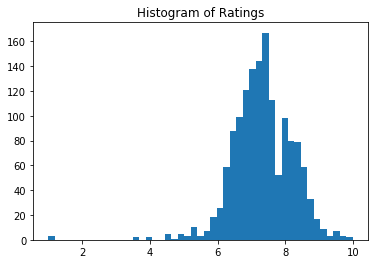

In [5]:
# exploratory data: ratings

# 1. clean data
drama_df['rating'] = drama_df['rating'].astype(float) # convert to float

drama_df = drama_df[pd.notnull(drama_df['rating'])] # remove NaN

# 2. graph the data
plt.hist(drama_df['rating'], bins='auto')
plt.title("Histogram of Ratings")
plt.show()

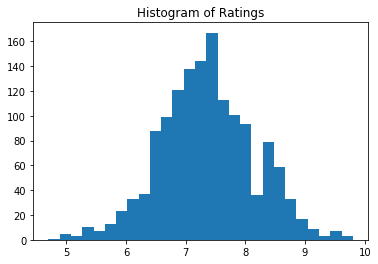

In [6]:
# 3. removing rating outliers
rating_mean = numpy.mean(drama_df['rating'])
rating_std = numpy.std(drama_df['rating'])
rating_std3 = rating_std*3
rating_upper = rating_mean + rating_std3
rating_lower = rating_mean - rating_std3

drama_df = drama_df[drama_df['rating'] > rating_lower]
drama_df = drama_df[drama_df['rating'] < rating_upper]

# 4. new graph
plt.hist(drama_df['rating'], bins='auto')
plt.title("Histogram of Ratings")
plt.show()
# normal

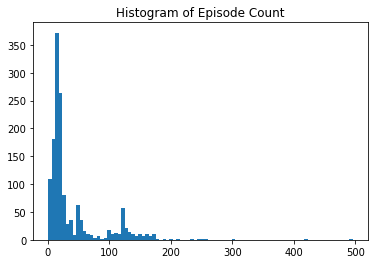

In [7]:
# exploratory data analysis: episode count
# 1. clean data (data should already be relatively clean, but just in case)
drama_df = drama_df[pd.notnull(drama_df['ep_count'])] # remove NaN

# 2. graph the data
plt.hist(drama_df['ep_count'], bins='auto')
plt.title("Histogram of Episode Count")
plt.show()

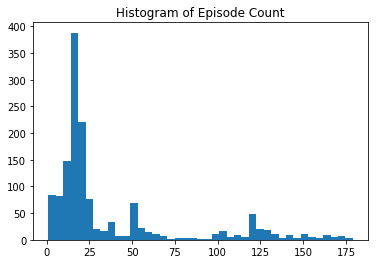

In [8]:
# 3. removing ep_count outliers
episode_mean = numpy.mean(drama_df['ep_count'])
episode_std = numpy.std(drama_df['ep_count'])
episode_std3 = episode_std*3
episode_upper = episode_mean + episode_std3
episode_lower = episode_mean - episode_std3

drama_df = drama_df[drama_df['ep_count'] > episode_lower]
drama_df = drama_df[drama_df['ep_count'] < episode_upper]

# 4. new graph
plt.hist(drama_df['ep_count'], bins='auto')
plt.title("Histogram of Episode Count")
plt.show()

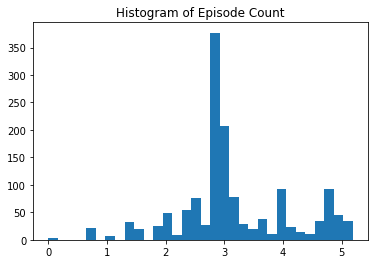

In [9]:
# 5. normalizing the data
# what if we log it?
logged_eps = drama_df['ep_count'].map(lambda x: numpy.log(int(x)))
plt.hist(logged_eps, bins='auto')
plt.title("Histogram of Episode Count")
plt.show()
# much more normal!
drama_df['ep_count'] = logged_eps
# better

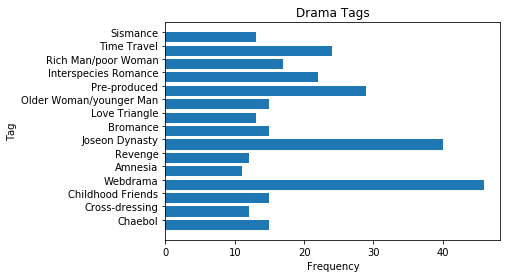

In [10]:
# exploratory data analysis: tags
# 1. clean data
drama_df['tags'].fillna("", inplace=True) # fill NaN with ""

drama_df['tags'] = drama_df['tags'].map(lambda x: str(x)[6:])

# create a dictionary for all the tags to keep track of counts
tags_dict = {}
for tags in drama_df['tags']:
    tags_list = tags.split(", ")
    for tag in tags_list:
        if tag in tags_dict:
            tags_dict[tag] += 1
        else:
            tags_dict[tag] = 1
            
# remove the '' tags (no tags)
tags_dict.pop('', None)


# 2. graph the data
# only take the top 15 since there are so many
tags_dict15 = dict(sorted(tags_dict.items(), key=operator.itemgetter
                         (1), reverse=True)[:15])
y_tags_count = tags_dict15.values()
x_all_tags = tags_dict15.keys()

fig, ax = plt.subplots()

x_ind_tags = numpy.arange(len(x_all_tags))
ax.barh(x_ind_tags, y_tags_count, 0.75)
ax.set_yticks(x_ind_tags+.75/2)
ax.set_yticklabels(x_all_tags)
plt.ylabel('Tag')
plt.xlabel('Frequency')
plt.title("Drama Tags")
plt.show()

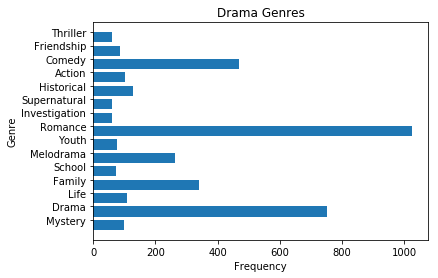

In [11]:
# exploratory data analysis: genres
# 1. clean data
drama_df['genres'].fillna("", inplace=True) # fill NaN with ""

drama_df['genres'] = drama_df['genres'].map(lambda x: str(x)[8:])
        
# create a dictionary for all the tags to keep track of counts
genres_dict = {}
for genres in drama_df['genres']:
    genres_list = genres.split(", ")
    for genre in genres_list:
        if genre in genres_dict:
            genres_dict[genre] += 1
        else:
            genres_dict[genre] = 1
            
# remove the '' genres (no genres)
genres_dict.pop('', None)


# 2. graph the data
# only take the top 15 since there are so many
genres_dict15 = dict(sorted(genres_dict.items(), key=operator.itemgetter
                            (1), reverse=True)[:15])

x_all_genres = genres_dict15.keys()
y_genres_count = genres_dict15.values()

fig, ax = plt.subplots()

x_ind_genres = numpy.arange(len(x_all_genres))
ax.barh(x_ind_genres, y_genres_count, 0.75)
ax.set_yticks(x_ind_genres+.75/2)
ax.set_yticklabels(x_all_genres)
plt.ylabel('Genre')
plt.xlabel('Frequency')
plt.title("Drama Genres")
plt.show()

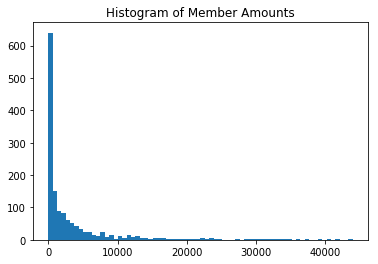

In [12]:
# exploratory data analysis: member amount
# 1. clean the data
drama_df['member_amount'] = drama_df['member_amount'].map(lambda x: str(x).replace(',', ''))
drama_df['member_amount'] = drama_df['member_amount'].astype(int) # convert to int

# 2. graph the data
plt.hist(drama_df['member_amount'], bins='auto')
plt.title("Histogram of Member Amounts")
plt.show()
    
# this data is heavily skewed to the right

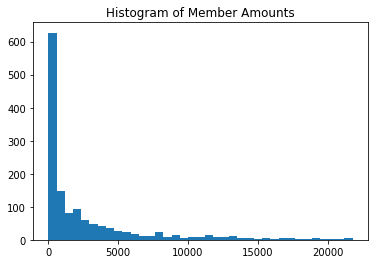

In [13]:
# 3. identifying member outliers
member_mean = numpy.mean(drama_df['member_amount'])
member_std = numpy.std(drama_df['member_amount'])
member_std3 = member_std*3
member_upper = member_mean + member_std3
member_lower = member_mean - member_std3

member_outliers = drama_df[drama_df['member_amount'] > member_lower]
member_outliers = member_outliers[member_outliers[
    'member_amount'] < member_upper]

# 4. new graph
plt.hist(member_outliers['member_amount'], bins='auto')
plt.title("Histogram of Member Amounts")
plt.show()
# still skewed to the right
# end up NOT removing outliers since outliers are relevant

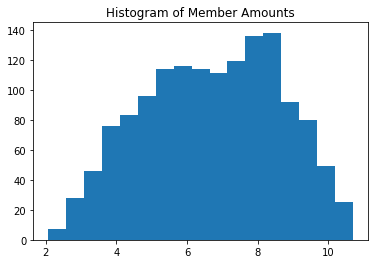

In [14]:
# 4. normalizing the data
# what if we log it?
logged_members = drama_df['member_amount'].map(lambda x: numpy.log(int(x)))
plt.hist(logged_members, bins='auto')
plt.title("Histogram of Member Amounts")
plt.show()
# much more normal!
drama_df['member_amount'] = logged_members

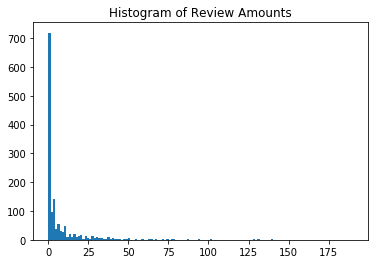

In [15]:
# exploratory data analysis: review amount
# 1. clean the data
drama_df['review_amount'] = drama_df['review_amount'].map(lambda x: str(x).replace(' users', ''))
drama_df['review_amount'] = drama_df['review_amount'].astype(int) # convert to int

# 2. graph the data
plt.hist(drama_df['review_amount'], bins='auto')
plt.title("Histogram of Review Amounts")
plt.show()
# this data is heavily skewed to the right

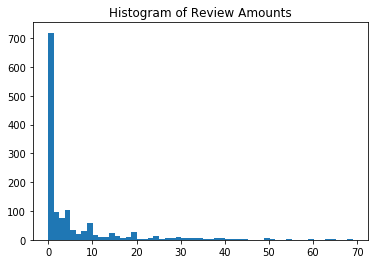

In [16]:
# 3. identifying review outliers
review_mean = numpy.mean(drama_df['review_amount'])
review_std = numpy.std(drama_df['review_amount'])
review_std3 = review_std*3
review_upper = review_mean + review_std3
review_lower = review_mean - review_std3

review_nooutliers = drama_df[drama_df['review_amount'] > review_lower]
review_nooutliers = review_nooutliers[review_nooutliers[
    'review_amount'] < review_upper]

# 4. new graph
plt.hist(review_nooutliers['review_amount'], bins='auto')
plt.title("Histogram of Review Amounts")
plt.show()

# removing outliers won't actually benefit the data, so keep them

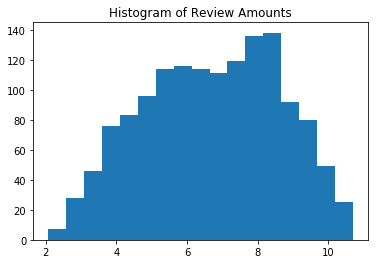

In [17]:
# 5. normalizing the data
# what if we log it? because there are 0s, we do log(x + 1)
logged_reviews = drama_df['review_amount'].map(lambda x: numpy.log(int(x + 1)))
plt.hist(logged_members, bins='auto')
plt.title("Histogram of Review Amounts")
plt.show()
# much more normal!
drama_df['review_amount'] = logged_reviews

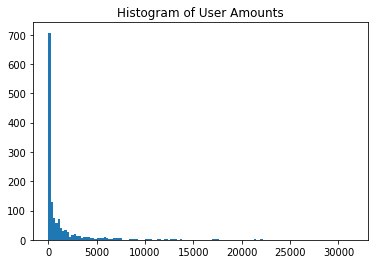

In [18]:
# exploratory data analysis: user amount
# 1. clean the data
drama_df['user_amount'] = drama_df['user_amount'].map(lambda x: str(x).replace(',', ''))
drama_df['user_amount'] = drama_df['user_amount'].map(lambda x: str(x).replace('nan', '0'))
drama_df['user_amount'] = drama_df['user_amount'].astype(int) # convert to int

# 2. graph the data
plt.hist(drama_df['user_amount'], bins='auto')
plt.title("Histogram of User Amounts")
plt.show()
    
# this data is heavily skewed to the right

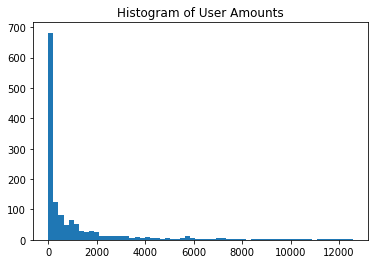

In [19]:
# 3. identifying user outliers
user_mean = numpy.mean(drama_df['user_amount'])
user_std = numpy.std(drama_df['user_amount'])
user_std3 = user_std*3
user_upper = user_mean + user_std3
user_lower = user_mean - user_std3

user_outliers = drama_df[drama_df['user_amount'] > user_lower]
user_outliers = user_outliers[user_outliers[
    'user_amount'] < user_upper]

# 4. new graph
plt.hist(user_outliers['user_amount'], bins='auto')
plt.title("Histogram of User Amounts")
plt.show()

# removing outliers won't actually benefit the data, so keep them

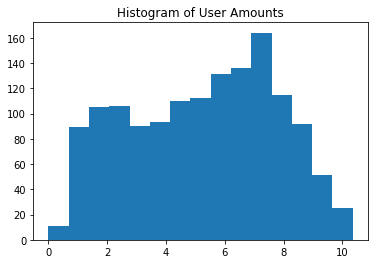

In [20]:
# 5. normalizing the data
# what if we log it? because there are 0s, we do log(x + 1)
logged_users = drama_df['user_amount'].map(lambda x: numpy.log(int(x + 1)))
plt.hist(logged_users, bins='auto')
plt.title("Histogram of User Amounts")
plt.show()
# better
drama_df['user_amount'] = logged_users

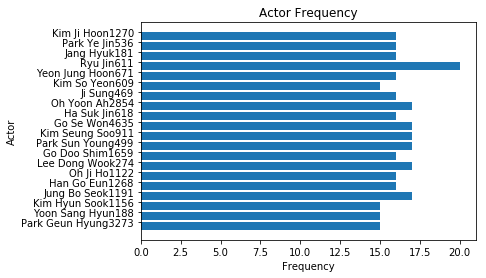

In [21]:
# exploratory data analysis: actors
# 1. clean the data
drama_df = drama_df[pd.notnull(drama_df['actors'])] # remove NaN

# create a dictionary for all the actors to keep track of how many dramas they're in
actors_dict = {}
for actor_dicts in drama_df['actors']:
    for actor_dict in actor_dicts:
        # turn values from unicode to string in this dictionary
        string_dict = dict((k , str(v)) for k, v in actor_dict.iteritems())
        # each url has a number to help distinguish the person's name
        
        # will concatenate this number to their name so people with the same
        # name will be able to maintain their identity
        url_dig = string_dict['url'].split('people/')[1].split('-')[0] 
        name = string_dict['name'] + url_dig
        if name in actors_dict:
            count = actors_dict[name]
            actors_dict[name] = count + 1
        else:
            actors_dict[name] = 1

# 2. graph the data
# only take the most active actors 20 since there are so many
actors_dict20 = dict(sorted(actors_dict.items(), key=operator.itemgetter
                            (1), reverse=True)[:20])

x_all_actors = actors_dict20.keys()
y_actors_count = actors_dict20.values()

fig, ax = plt.subplots()

x_ind_actors = numpy.arange(len(x_all_actors))
ax.barh(x_ind_actors, y_actors_count, 0.75)
ax.set_yticks(x_ind_actors+.75/2)
ax.set_yticklabels(x_all_actors)
plt.ylabel('Actor')
plt.xlabel('Frequency')
plt.title("Actor Frequency")
plt.show()

In [22]:
# for future models, a way to utilize actor data is to take the average
# of the heart counts (a way to rate actors) for the actors mentioned
# in each drama, so adding a column to the end of the dataframe with
# this information will be helpful for the future

heart_avg = []
for actor_dicts in drama_df['actors']:
    actor_sum = 0
    actor_count = 0
    for actor_dict in actor_dicts:
        # turn values from unicode to string in this dictionary
        string_dict = dict((k , str(v)) for k, v in actor_dict.iteritems())
        # each url has a number to help distinguish the person's name
        
        # will concatenate this number to their name so people with the same
        # name will be able to maintain their identity
        url_dig = string_dict['url'].split('people/')[1].split('-')[0] 
        name = string_dict['name'] + url_dig
        try:
            curr_heartcount = actor_df.loc[actor_df['name_id'] == name, 'heart_count'].iloc[0]
            curr_heartcount
            curr_heartcount = str(curr_heartcount).replace(",", "")
            curr_heartcount = int(curr_heartcount)
            actor_sum += int(curr_heartcount)
            actor_count += 1
        except:
            continue
    actor_avg = actor_sum / actor_count
    heart_avg.append(actor_avg)  

drama_df['actor_rating'] = heart_avg
drama_df

,name,rating,description,year,ep_count,tags,genres,member_amount,review_amount,user_amount,actors,actor_rating
0,Signal,9.2,"After finding an old walkie-talkie, Detective ...",2016,2.772589,"Time Altering, Serial Killer, Based On True Ev...","Suspense, Mystery, Drama, Supernatural, Detect...",9.714987,4.369448,8.910451,[{u'url': u'https://mydramalist.com/people/181...,163
1,Stranger,9.1,A brain surgery during childhood caused prosec...,2017,2.772589,Corruption,"Thriller, Law, Drama, Detective, Investigation",8.715060,3.218876,7.688455,[{u'url': u'https://mydramalist.com/people/298...,141
2,While You Were Sleeping,9.0,A supernatural romance about a woman who can s...,2017,3.465736,"Foresight, Pre-produced","Thriller, Law, Romance, Supernatural",9.454541,0.000000,7.794823,[{u'url': u'https://mydramalist.com/people/422...,980
3,Goblin,9.1,Kim Shin is a Goblin who is cursed with immort...,2016,2.772589,"Goblin, Grim Reaper, Bromance, Rich Man/poor W...","Comedy, Romance, Melodrama, Supernatural",10.279901,4.897840,9.774347,[{u'url': u'https://mydramalist.com/people/440...,1094
4,Weightlifting Fairy Kim Bok Joo,9.0,Kim Bok Joo is a student in Haneol College of ...,2016,2.772589,"Inspired By Real Person, Childhood Friends, Ni...","Friendship, Comedy, Romance, School, Youth, Sp...",10.078365,4.532599,9.615472,[{u'url': u'https://mydramalist.com/people/766...,626
5,Defendant,8.9,Park Jeong Woo is a prosecutor at Seoul Centra...,2017,2.890372,"Prison, Amnesia","Suspense, Thriller, Mystery, Law, Drama",8.950014,2.944439,8.013012,[{u'url': u'https://mydramalist.com/people/469...,369
6,Chicago Typewriter,8.9,Han Se Joo was a writer in his past life durin...,2017,2.772589,"Time Travel, Bromance, Love Triangle, Ghost, R...","Friendship, Mystery, Comedy, Romance, Supernat...",9.007122,3.496508,8.174139,[{u'url': u'https://mydramalist.com/people/432...,298
7,Age of Youth 2,8.9,"Set one year after season 1 of ""Age of Youth.""...",2017,2.639057,,"Friendship, Mystery, Comedy, Romance, Life, Yo...",8.515191,0.000000,7.635787,[{u'url': u'https://mydramalist.com/people/417...,177
8,"Kill Me, Heal Me",8.9,"After a traumatic experience in his childhood,...",2015,2.995732,"Chaebol, Mental Health, Amnesia, Childhood Fri...","Mystery, Psychological, Comedy, Romance, Drama...",10.322428,4.867534,9.758751,[{u'url': u'https://mydramalist.com/people/469...,830
9,Dear My Friends,8.9,"A realistic, cheerful story about “twilight yo...",2016,2.772589,"Elder, Alzheimer's Disease","Friendship, Life, Drama, Family, Melodrama",8.140607,2.302585,6.845880,[{u'url': u'https://mydramalist.com/people/489...,38


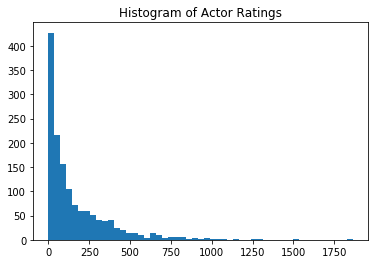

In [23]:
# exploratory data analysis: actor rating
# 1. clean the data
# data is already clean (nothing missing, doesn't need to change type)

# 2. graph the data
plt.hist(drama_df['actor_rating'], bins='auto')
plt.title("Histogram of Actor Ratings")
plt.show()
    
# this data is heavily skewed to the right

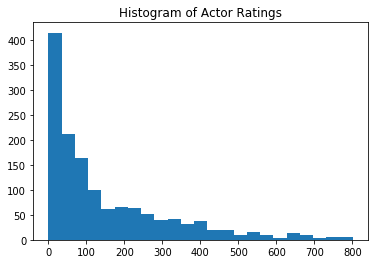

In [24]:
# 3. identifying actor rating outliers
actorrat_mean = numpy.mean(drama_df['actor_rating'])
actorrat_std = numpy.std(drama_df['actor_rating'])
actorrat_std3 = actorrat_std*3
actorrat_upper = actorrat_mean + actorrat_std3
actorrat_lower = actorrat_mean - actorrat_std3

actorrat_outliers = drama_df[drama_df['actor_rating'] > actorrat_lower]
actorrat_outliers = actorrat_outliers[actorrat_outliers[
    'actor_rating'] < actorrat_upper]

# 4. new graph
plt.hist(actorrat_outliers['actor_rating'], bins='auto')
plt.title("Histogram of Actor Ratings")
plt.show()

# removing outliers won't actually benefit the data, so keep them

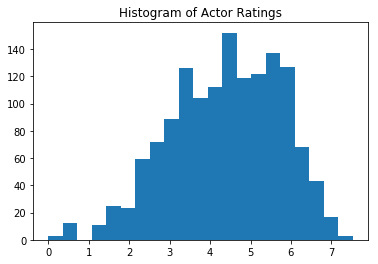

In [25]:
# 5. normalizing data
# what if we log it? because there are 0s, we do log(x + 1)
logged_actors = drama_df['actor_rating'].map(lambda x: numpy.log(int(x + 1)))
plt.hist(logged_actors, bins='auto')
plt.title("Histogram of Actor Ratings")
plt.show()
# better
drama_df['actor_rating'] = logged_actors

In [26]:
# exploratory data analysis: correlation/collinearity
# pearson's correlation between rating & actor rating:
rating_actorrating_correl = pearsonr(drama_df['actor_rating'], 
                                     drama_df['rating'])
rating_actorrating_correl # 0.2930; p = 1.39e-29

(0.29298673216949411, 1.3859805710965013e-29)

In [27]:
# pearson's correlation between rating & member_amount:
rating_member_correl = pearsonr(drama_df['member_amount'], 
                                     drama_df['rating'])
rating_member_correl # 0.3740; p = 1.71e-48

(0.37396651525834784, 1.7085757997222354e-48)

In [28]:
# pearson's correlation between rating & review_amount:
rating_review_correl = pearsonr(drama_df['review_amount'], 
                                     drama_df['rating'])
rating_review_correl # 0.4176; p = 3.38e-61

(0.41760252471228931, 3.3845852622604867e-61)

In [29]:
# pearson's correlation between rating & ep_count:
rating_episode_correl = pearsonr(drama_df['ep_count'], 
                                     drama_df['rating'])
rating_episode_correl # -0.0125; p = 0.64; not significant

(-0.012510827473932578, 0.63713271780982672)

In [30]:
# pearson's correlation between rating & user_amount:
rating_user_correl = pearsonr(drama_df['user_amount'], 
                                     drama_df['rating'])
rating_user_correl # 0.3206; p = 2.10e-35

(0.32061895674959845, 2.1002403490291345e-35)

In [31]:
# pearson's correlation between actor_rating & user_amount:
actorrating_user_correl = pearsonr(drama_df['user_amount'], 
                                     drama_df['actor_rating'])
actorrating_user_correl # 0.6594; p = 2.13e-178

(0.65938424752128255, 2.1300645403391905e-178)

In [32]:
# pearson's correlation between actor_rating & member_amount:
actorrating_member_correl = pearsonr(drama_df['member_amount'], 
                                     drama_df['actor_rating'])
actorrating_member_correl # 0.7071; p = 2.99e-216

(0.70706902252588888, 2.9943003213312822e-216)

In [33]:
# pearson's correlation between actor_rating & review_amount:
actorrating_review_correl = pearsonr(drama_df['review_amount'], 
                                     drama_df['actor_rating'])
actorrating_review_correl # 0.6332; p = 2.05e-160

(0.63318774241060038, 2.0496158631502073e-160)

In [34]:
# pearson's correlation between actor_rating & ep_count:
actorrating_episode_correl = pearsonr(drama_df['ep_count'], 
                                     drama_df['actor_rating'])
actorrating_episode_correl # -0.1729; p = 4.37e-10

(-0.17285064407945711, 5.1534102114589813e-11)

# DATA STORAGE & RETRIEVAL

In [35]:
client = MongoClient('localhost', 27017)
db = client['ds4100_db']

In [36]:
drama_collection = db.dramas # dramas collection
actor_collection = db.actors # actors collection
genre_collection = db.genres # genres collection
tag_collection = db.tags # tags collection

drama_tocollection = drama_df.to_dict(orient='records')
actor_tocollection = actor_df.to_dict(orient='records')

In [37]:
# inserting drama_df into the dramas collection
drama_insert_id = []
for insert in drama_tocollection:
    result = drama_collection.insert_one(insert)
    drama_insert_id.append(result)

In [38]:
# inserting actor_df into the actors collection
actor_insert_id = []
for insert in actor_tocollection:
    result = actor_collection.insert_one(insert)
    actor_insert_id.append(result)

In [72]:
for insert in genres_dict:
    print {genres_dict[insert], insert}

set([11, 'Sci-Fi'])
set(['Political', 44])
set([13, 'Vampire'])
set(['Sports', 23])
set(['Romance', 1026])
set(['Investigation', 60])
set(['Supernatural', 60])
set(['Comedy', 470])
set([5, 'War'])
set(['Life', 109])
set([52, 'Business'])
set(['Food', 38])
set([3, 'Documentary'])
set(['Horror', 13])
set([9, 'Mature'])
set([9, 'Adventure'])
set(['Law', 31])
set(['Tragedy', 31])
set(['Thriller', 62])
set(['Mystery', 100])
set([72, 'School'])
set([1, 'Animals'])
set([56, 'Medical'])
set([264, 'Melodrama'])
set(['Sitcom', 38])
set([752, 'Drama'])
set([2, 'Tokusatsu'])
set([128, 'Historical'])
set(['Action', 101])
set(['Military', 14])
set([34, 'Crime'])
set(['Friendship', 87])
set([25, 'Manga'])
set(['Detective', 33])
set(['Youth', 78])
set([340, 'Family'])
set(['Psychological', 25])
set(['Fantasy', 50])
set(['Suspense', 47])
set(['Music', 39])
set([ObjectId('5a1c70e6d404a3186d20d609'), '_id'])
set([8, 'Martial Arts'])


In [65]:
genre_collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'ds4100_db'), u'genres')

In [39]:
# inserting all the genres into the genres collection 
# it's just one dictionary, so no need for a loop
genre_insert_id = []
for insert in genres_dict:
    inserting = {'genre': insert}
    result = genre_collection.insert_one(inserting)
    genre_insert_id.append(result)
    
# inserting all the tags into the tags collection
# have to redo one tag
tags_dict['AI'] = tags_dict['A.i.']
del tags_dict['A.i.'] # this won't go into the database
tag_insert_id = []
for insert in tags_dict:
    inserting = {'tag': insert}
    result = tag_collection.insert_one(inserting)
    tag_insert_id.append(result)

In [40]:
# retrieval
retrieved_dramas = pd.DataFrame(list(drama_collection.find()))
retrieved_dramas

,_id,actor_rating,actors,description,ep_count,genres,member_amount,name,rating,review_amount,tags,user_amount,year
0,5a1c7e07d404a31a459c7502,5.099866,[{u'url': u'https://mydramalist.com/people/181...,"After finding an old walkie-talkie, Detective ...",2.772589,"Suspense, Mystery, Drama, Supernatural, Detect...",9.714987,Signal,9.2,4.369448,"Time Altering, Serial Killer, Based On True Ev...",8.910451,2016
1,5a1c7e07d404a31a459c7503,4.955827,[{u'url': u'https://mydramalist.com/people/298...,A brain surgery during childhood caused prosec...,2.772589,"Thriller, Law, Drama, Detective, Investigation",8.715060,Stranger,9.1,3.218876,Corruption,7.688455,2017
2,5a1c7e07d404a31a459c7504,6.888572,[{u'url': u'https://mydramalist.com/people/422...,A supernatural romance about a woman who can s...,3.465736,"Thriller, Law, Romance, Supernatural",9.454541,While You Were Sleeping,9.0,0.000000,"Foresight, Pre-produced",7.794823,2017
3,5a1c7e07d404a31a459c7505,6.998510,[{u'url': u'https://mydramalist.com/people/440...,Kim Shin is a Goblin who is cursed with immort...,2.772589,"Comedy, Romance, Melodrama, Supernatural",10.279901,Goblin,9.1,4.897840,"Goblin, Grim Reaper, Bromance, Rich Man/poor W...",9.774347,2016
4,5a1c7e07d404a31a459c7506,6.440947,[{u'url': u'https://mydramalist.com/people/766...,Kim Bok Joo is a student in Haneol College of ...,2.772589,"Friendship, Comedy, Romance, School, Youth, Sp...",10.078365,Weightlifting Fairy Kim Bok Joo,9.0,4.532599,"Inspired By Real Person, Childhood Friends, Ni...",9.615472,2016
5,5a1c7e07d404a31a459c7507,5.913503,[{u'url': u'https://mydramalist.com/people/469...,Park Jeong Woo is a prosecutor at Seoul Centra...,2.890372,"Suspense, Thriller, Mystery, Law, Drama",8.950014,Defendant,8.9,2.944439,"Prison, Amnesia",8.013012,2017
6,5a1c7e07d404a31a459c7508,5.700444,[{u'url': u'https://mydramalist.com/people/432...,Han Se Joo was a writer in his past life durin...,2.772589,"Friendship, Mystery, Comedy, Romance, Supernat...",9.007122,Chicago Typewriter,8.9,3.496508,"Time Travel, Bromance, Love Triangle, Ghost, R...",8.174139,2017
7,5a1c7e07d404a31a459c7509,5.181784,[{u'url': u'https://mydramalist.com/people/417...,"Set one year after season 1 of ""Age of Youth.""...",2.639057,"Friendship, Mystery, Comedy, Romance, Life, Yo...",8.515191,Age of Youth 2,8.9,0.000000,,7.635787,2017
8,5a1c7e07d404a31a459c750a,6.722630,[{u'url': u'https://mydramalist.com/people/469...,"After a traumatic experience in his childhood,...",2.995732,"Mystery, Psychological, Comedy, Romance, Drama...",10.322428,"Kill Me, Heal Me",8.9,4.867534,"Chaebol, Mental Health, Amnesia, Childhood Fri...",9.758751,2015
9,5a1c7e07d404a31a459c750b,3.663562,[{u'url': u'https://mydramalist.com/people/489...,"A realistic, cheerful story about “twilight yo...",2.772589,"Friendship, Life, Drama, Family, Melodrama",8.140607,Dear My Friends,8.9,2.302585,"Elder, Alzheimer's Disease",6.845880,2016


In [41]:
retrieved_actors = pd.DataFrame(list(actor_collection.find()))
retrieved_actors

,_id,heart_count,name,name_id,url
0,5a1c7e07d404a31a459c7a92,"3,179",Lee Min Ho,Lee Min Ho232,https://mydramalist.com/people/232-lee-min-ho
1,5a1c7e08d404a31a459c7a93,"4,220",Lee Jong Suk,Lee Jong Suk900,https://mydramalist.com/people/900-lee-jong-suk
2,5a1c7e08d404a31a459c7a94,"2,649",Park Shin Hye,Park Shin Hye210,https://mydramalist.com/people/210-park-shin-hye
3,5a1c7e08d404a31a459c7a95,"3,147",Ji Chang Wook,Ji Chang Wook806,https://mydramalist.com/people/806-ji-chang-wook
4,5a1c7e08d404a31a459c7a96,"2,618",Song Joong Ki,Song Joong Ki431,https://mydramalist.com/people/431-song-joong-ki
5,5a1c7e08d404a31a459c7a97,"1,618",Kim So Hyun,Kim So Hyun1851,https://mydramalist.com/people/1851-kim-so-hyun
6,5a1c7e08d404a31a459c7a98,"2,338",Kim Soo Hyun,Kim Soo Hyun424,https://mydramalist.com/people/424-kim-soo-hyun
7,5a1c7e08d404a31a459c7a99,"2,253",Lee Joon Gi,Lee Joon Gi207,https://mydramalist.com/people/207-lee-joon-gi
8,5a1c7e08d404a31a459c7a9a,"2,330",Kim Woo Bin,Kim Woo Bin2406,https://mydramalist.com/people/2406-kim-woo-bin
9,5a1c7e08d404a31a459c7a9b,"1,003",L,L1552,https://mydramalist.com/people/1552-l


In [42]:
retrieved_genres = pd.DataFrame(list(genre_collection.find()))
retrieved_genres

,_id,genre
0,5a1c7e09d404a31a459c8e1a,Sci-Fi
1,5a1c7e0ad404a31a459c8e1b,Political
2,5a1c7e0ad404a31a459c8e1c,Vampire
3,5a1c7e0ad404a31a459c8e1d,Sports
4,5a1c7e0ad404a31a459c8e1e,Romance
5,5a1c7e0ad404a31a459c8e1f,Investigation
6,5a1c7e0ad404a31a459c8e20,Supernatural
7,5a1c7e0ad404a31a459c8e21,Comedy
8,5a1c7e0ad404a31a459c8e22,War
9,5a1c7e0ad404a31a459c8e23,Life


In [43]:
retrieved_tags = pd.DataFrame(list(tag_collection.find()))
retrieved_tags

,_id,tag
0,5a1c7e0ad404a31a459c8e43,Three Kingdoms
1,5a1c7e0ad404a31a459c8e44,Contract Relationship
2,5a1c7e0ad404a31a459c8e45,Cohabitation
3,5a1c7e0ad404a31a459c8e46,Political
4,5a1c7e0ad404a31a459c8e47,Unrequited Love
5,5a1c7e0ad404a31a459c8e48,Makeover
6,5a1c7e0ad404a31a459c8e49,Devil
7,5a1c7e0ad404a31a459c8e4a,Amnesia
8,5a1c7e0ad404a31a459c8e4b,Family Secret
9,5a1c7e0ad404a31a459c8e4c,Smart Male Lead


# MODEL CONSTRUCTION & EVALUATION

## linear regression modeling 

In [44]:
# linear regression model: Y = rating
variables = ['actor_rating', 'user_amount', 'ep_count', 
             'review_amount', 'member_amount']
y = drama_df['rating']

# creating training & test data
X_train, X_test, y_train, y_test = train_test_split(
    drama_df[variables], y, test_size=0.2, random_state=1)

# fitting the model
linreg = sm.OLS(y_train, X_train).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.024e+04
Date:                Thu, 30 Nov 2017   Prob (F-statistic):               0.00
Time:                        14:10:49   Log-Likelihood:                -1712.6
No. Observations:                1139   AIC:                             3435.
Df Residuals:                    1134   BIC:                             3460.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
actor_rating      0.1584      0.034      4.700      0.000       0.092       0.225
user_amount      -0.5612      0.036    -15.394      0.000      -0.633      -0.490
ep_count          0.5275      0.029     18.183      0.000       0.471       0.584
review_amount    -0.3446      0.044     -7.871      0.000      -0.431      -0.259
member_amount     1.2312      0.042     29.193      0.000       1.148       1.314
==============================================================================
Omnibus:                      144.477   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.211
Skew:                           0.676   Prob(JB):                     6.12e-84
Kurtosis:                       5.499   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### r-squared = .978, very good fit!!
### every single p-value is below .05, so all variables work in this model. this model means that actor_rating, user_amount, ep_count, review_amount and member_amount are statistically significant values that help predict the overall rating of a drama.

In [45]:
# MAD of rating data
lin_predict_rating = linreg.predict(X_test)
lin_diffs_rating = abs(lin_predict_rating - y_test)
MAD_lin_rating = sum(lin_diffs_rating)/len(lin_diffs_rating)
MAD_lin_rating

0.71706748640055473

In [46]:
# linear regression: Y = actor_rating
variables = ['rating', 'user_amount', 'ep_count', 
             'review_amount', 'member_amount']
y = drama_df['actor_rating']

# creating testing & training data
X_train, X_test, y_train, y_test = train_test_split(
    drama_df[variables], y, test_size=0.2, random_state=1)

# fitting the model
linreg = sm.OLS(y_train, X_train).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           actor_rating   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     5101.
Date:                Thu, 30 Nov 2017   Prob (F-statistic):               0.00
Time:                        14:10:49   Log-Likelihood:                -1557.4
No. Observations:                1139   AIC:                             3125.
Df Residuals:                    1134   BIC:                             3150.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
rating            0.1206      0.026      4.700      0.000       0.070       0.171
user_amount      -0.0734      0.035     -2.104      0.036      -0.142      -0.005
ep_count         -0.0126      0.029     -0.438      0.662      -0.069       0.044
review_amount     0.0174      0.039      0.442      0.658      -0.060       0.094
member_amount     0.5810      0.046     12.756      0.000       0.492       0.670
==============================================================================
Omnibus:                       10.524   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.340
Skew:                           0.086   Prob(JB):                     0.000769
Kurtosis:                       3.522   Cond. No.                         24.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### r=squared = .957, very good fit!!!
### all p-values are below .05 besides ep_count and review_amount, so we have to tweak the model.

In [42]:
# visualizing the results
plt.

SyntaxError: invalid syntax (<ipython-input-42-07b2673312de>, line 2)

In [47]:
# ep_count and review_amount are not significant
variables = ['rating', 'user_amount', 'member_amount']
y = drama_df['actor_rating']

# creating testing & training data
X_train, X_test, y_train, y_test = train_test_split(
    drama_df[variables], y, test_size=0.2, random_state=1)

# fitting the model
linreg = sm.OLS(y_train, X_train).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           actor_rating   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     8512.
Date:                Thu, 30 Nov 2017   Prob (F-statistic):               0.00
Time:                        14:10:49   Log-Likelihood:                -1557.6
No. Observations:                1139   AIC:                             3121.
Df Residuals:                    1136   BIC:                             3136.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
rating            0.1106      0.021      5.307      0.000       0.070       0.151
user_amount      -0.0674      0.033     -2.035      0.042      -0.132      -0.002
member_amount     0.5848      0.045     13.076      0.000       0.497       0.673
==============================================================================
Omnibus:                       10.455   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.099
Skew:                           0.090   Prob(JB):                     0.000868
Kurtosis:                       3.515   Cond. No.                         23.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### r=squared = .957, still very good fit!!!
### all p-values are below .05 now. this model means that rating, user_amount and member_amount are statistically significant values that help predict overall actor_rating of a drama.

In [48]:
# MAD of test data
lin_predict_actrating = linreg.predict(X_test)
lin_diffs_actrating = abs(lin_predict_actrating - y_test)
MAD_lin_actrating = sum(lin_diffs_actrating)/len(lin_diffs_actrating)
MAD_lin_actrating

0.75271762909347362

## knn model classification

In [55]:
# for this type of model, we will be predicting whether the drama
# is classified as "romance" or not. to do this, we need to add a 
# column in the data frame indicating whether or not this drama has 
# 'romance' in its genres.

romance_tf = []
for genres in drama_df['genres']:
    curr = False
    if "Romance" in genres:
        curr = True
    romance_tf.append(curr)

# True = "Romance" exists, False if otherwise    
drama_df['romance'] = romance_tf 

y = drama_df['romance']
variables = ['rating', 'user_amount', 'ep_count', 
             'review_amount', 'member_amount', 'actor_rating']
# creating testing & training data
X_train, X_test, y_train, y_test = train_test_split(
    drama_df[variables], y, test_size=0.3, random_state=1)

drama_df

,name,rating,description,year,ep_count,tags,genres,member_amount,review_amount,user_amount,actors,actor_rating,romance
0,Signal,9.2,"After finding an old walkie-talkie, Detective ...",2016,2.772589,"Time Altering, Serial Killer, Based On True Ev...","Suspense, Mystery, Drama, Supernatural, Detect...",9.714987,4.369448,8.910451,[{u'url': u'https://mydramalist.com/people/181...,5.099866,False
1,Stranger,9.1,A brain surgery during childhood caused prosec...,2017,2.772589,Corruption,"Thriller, Law, Drama, Detective, Investigation",8.715060,3.218876,7.688455,[{u'url': u'https://mydramalist.com/people/298...,4.955827,False
2,While You Were Sleeping,9.0,A supernatural romance about a woman who can s...,2017,3.465736,"Foresight, Pre-produced","Thriller, Law, Romance, Supernatural",9.454541,0.000000,7.794823,[{u'url': u'https://mydramalist.com/people/422...,6.888572,True
3,Goblin,9.1,Kim Shin is a Goblin who is cursed with immort...,2016,2.772589,"Goblin, Grim Reaper, Bromance, Rich Man/poor W...","Comedy, Romance, Melodrama, Supernatural",10.279901,4.897840,9.774347,[{u'url': u'https://mydramalist.com/people/440...,6.998510,True
4,Weightlifting Fairy Kim Bok Joo,9.0,Kim Bok Joo is a student in Haneol College of ...,2016,2.772589,"Inspired By Real Person, Childhood Friends, Ni...","Friendship, Comedy, Romance, School, Youth, Sp...",10.078365,4.532599,9.615472,[{u'url': u'https://mydramalist.com/people/766...,6.440947,True
5,Defendant,8.9,Park Jeong Woo is a prosecutor at Seoul Centra...,2017,2.890372,"Prison, Amnesia","Suspense, Thriller, Mystery, Law, Drama",8.950014,2.944439,8.013012,[{u'url': u'https://mydramalist.com/people/469...,5.913503,False
6,Chicago Typewriter,8.9,Han Se Joo was a writer in his past life durin...,2017,2.772589,"Time Travel, Bromance, Love Triangle, Ghost, R...","Friendship, Mystery, Comedy, Romance, Supernat...",9.007122,3.496508,8.174139,[{u'url': u'https://mydramalist.com/people/432...,5.700444,True
7,Age of Youth 2,8.9,"Set one year after season 1 of ""Age of Youth.""...",2017,2.639057,,"Friendship, Mystery, Comedy, Romance, Life, Yo...",8.515191,0.000000,7.635787,[{u'url': u'https://mydramalist.com/people/417...,5.181784,True
8,"Kill Me, Heal Me",8.9,"After a traumatic experience in his childhood,...",2015,2.995732,"Chaebol, Mental Health, Amnesia, Childhood Fri...","Mystery, Psychological, Comedy, Romance, Drama...",10.322428,4.867534,9.758751,[{u'url': u'https://mydramalist.com/people/469...,6.722630,True
9,Dear My Friends,8.9,"A realistic, cheerful story about “twilight yo...",2016,2.772589,"Elder, Alzheimer's Disease","Friendship, Life, Drama, Family, Melodrama",8.140607,2.302585,6.845880,[{u'url': u'https://mydramalist.com/people/489...,3.663562,False


The optimal number of neighbors is 19


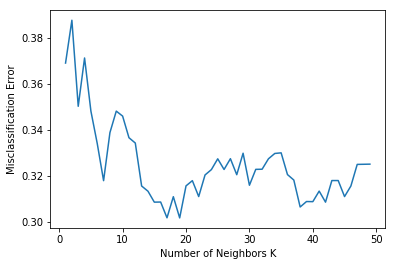

The error at optimal k is 0.315630


In [50]:
# will find the optimal k to have the best score with a 10-fold
# cross validation
k_list = list(range(1, 50))

scores = []
for k in k_list:
    neigh = KNeighborsClassifier(n_neighbors=k)
    # fitting the model
    neigh.fit(X_train, y_train)
    # using the model against the test data now
    knn_predict_romance = neigh.predict(X_test)
    # finding how well the model did
    score = cross_val_score(neigh, X_test, y_test, 
                            cv=10, scoring='accuracy')
    scores.append(score.mean()) # append the score to the list
    
# finding misclassification error
error = [1 - x for x in scores]

# determining best k
optimalk = k_list[error.index(min(error))]
print "The optimal number of neighbors is %d" % optimalk
error_k = error[optimalk]

plt.plot(k_list, error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
print "The error at optimal k is %f" % error_k

### an error of 31-32% isn't too bad, time to compare it with logistic regression though.

## binary logistic regression model

In [51]:
# logistic regression: Y = romance
variables = ['rating', 'user_amount', 'ep_count', 
             'review_amount', 'member_amount', 'actor_rating']
# True = 1; False = 0
y = drama_df['romance'].map(lambda x: int(x))

# creating testing & training data
X_train, X_test, y_train, y_test = train_test_split(
    drama_df[variables], y, test_size=0.3, random_state=1)

logitreg = sm.Logit(y_train, X_train).fit()
logitreg.summary()

Optimization terminated successfully.
         Current function value: 0.514193
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                romance   No. Observations:                  996
Model:                          Logit   Df Residuals:                      990
Method:                           MLE   Df Model:                            5
Date:                Thu, 30 Nov 2017   Pseudo R-squ.:                  0.1124
Time:                        14:10:55   Log-Likelihood:                -512.14
converged:                       True   LL-Null:                       -576.99
                                        LLR p-value:                 2.752e-26
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
rating           -0.3195      0.067     -4.779      0.000      -0.451      -0.188
user_amount       0.2458      0.083      2.960      0.003       0.083       0.409
ep_count          0.3340      0.073      4.549      0.000       0.190       0.478
review_amount     0.0692      0.113      0.613      0.540      -0.152       0.290
member_amount     0.0309      0.119      0.260      0.795      -0.202       0.264
actor_rating      0.1909      0.077      2.476      0.013       0.040       0.342
=================================================================================
"""

### all values are below .05 besides review_amount and member_amount, so i'll remove them to see what happens

In [52]:
# logistic regression: Y = romance
variables = ['rating', 'user_amount', 'ep_count', 'actor_rating']
# True = 1; False = 0
y = drama_df['romance'].map(lambda x: int(x))

# creating testing & training data
X_train, X_test, y_train, y_test = train_test_split(
    drama_df[variables], y, test_size=0.3, random_state=1)

logitreg = sm.Logit(y_train, X_train).fit()
logitreg.summary()

Optimization terminated successfully.
         Current function value: 0.514466
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                romance   No. Observations:                  996
Model:                          Logit   Df Residuals:                      992
Method:                           MLE   Df Model:                            3
Date:                Thu, 30 Nov 2017   Pseudo R-squ.:                  0.1119
Time:                        14:10:55   Log-Likelihood:                -512.41
converged:                       True   LL-Null:                       -576.99
                                        LLR p-value:                 8.212e-28
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
rating          -0.3144      0.051     -6.204      0.000      -0.414      -0.215
user_amount      0.2884      0.040      7.224      0.000       0.210       0.367
ep_count         0.3261      0.073      4.497      0.000       0.184       0.468
actor_rating     0.2034      0.072      2.818      0.005       0.062       0.345
================================================================================
"""

### p-values look good

In [53]:
# odds ratios
numpy.exp(logitreg.params)

rating          0.730241
user_amount     1.334342
ep_count        1.385544
actor_rating    1.225524
dtype: float64

In [54]:
# finding out how well the model did
logit_predict_romance = logitreg.predict(X_test)
logit_predict_romance = logit_predict_romance.map(
    lambda x: round(x))

logit_score = float(float(sum(logit_predict_romance == y_test))/
                    float(len(y_test)))
1 - logit_score # find the error

0.30841121495327106

### when comparing the models (knn vs. logistic regression), logit seems to do better in terms of accuracy. overall though, both models have a 30-31% error rate, meaning that 70% of the time, they are accurate in their predictions when it comes to estimating whether or not a certain drama  is a romance one or not.